### Problem Statement for SilkySky International Airlines Passenger Satisfaction Analysis:
**The goal is to derive actionable insights that will not only improve the passenger experience but also boost business performance by increasing customer loyalty, enhancing revenue generation, and improving the market reputation in a competitive airline industry..**

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Loading Stage
file_path =  r'C:\Users\yedla\OneDrive\Desktop\Data Science Bootcamp\Machine learning\Assignments\SILKYSKY_DATA_CW2 (S).csv'
data = pd.read_csv(file_path,encoding='ISO-8859-1')

# Ingenral normal data sets will have utf-8 encoding

data.head()


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

**Entries and Features: The dataset consists of 103,904 entries and 27 features.**

#### Features Overview:

* Ref, id: Identifier columns.

* Gender, Age, Age Band: Demographic information of the passengers.

* Satisfied: Whether the passenger was satisfied (binary response).

* Type of Travel, Class: Details about the travel.

* Flight Distance, Destination, Continent: Information about the flight and destination.

* Service Ratings: Various ratings like 'Inflight wifi service', 'Food and drink', 'Online boarding', etc.

* Departure/Arrival Delays: Delay times in minutes.

* Missing Values: The 'Arrival Delay in Minutes' has some missing values.

In [4]:
# Check the percentage of missing values in each column
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage[missing_percentage > 0]


Arrival Delay in Minutes    0.298352
dtype: float64

The **"Arrival Delay in Minutes"** column has approximately **0.3% missing values**. Given the low percentage, we can handle these missing values by either filling them with a suitable statistic (like the mean or median) or removing the affected rows.

In [5]:
# Removing rows with missing values in 'Arrival Delay in Minutes'
data_cleaned = data.dropna(subset=['Arrival Delay in Minutes'])


In [6]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Satisfied                          103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Age Band                           103594 non-null  object 
 6   Type of Travel                     103594 non-null  object 
 7   Class                              103594 non-null  object 
 8   Flight Distance                    103594 non-null  int64  
 9   Destination                        103594 non-null  object 
 10  Continent                          103594 non-null  object 
 11  Inflight wifi service              103594 no

**Successfully removed the missing data because it is only contrbuting to a total of 0.3% of data only which under 5% OF MISSING DATA**

### Categorical Encoding 

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for column in categorical_columns:
    data_cleaned[column] = le.fit_transform(data_cleaned[column])

data_cleaned.head()


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,1,1,13,6,1,2,4760,31,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,1,0,25,1,0,0,235,67,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,0,1,26,1,0,0,4760,31,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,0,1,25,1,0,0,560,60,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,1,1,61,4,0,0,4760,31,...,5,3,3,4,4,3,3,3,0,0.0


In [8]:

summary_statistics = data_cleaned.describe()
summary_statistics


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,0.492480,0.817219,39.380466,2.500299,0.310143,0.593944,4164.102361,34.099369,...,3.399068,3.358254,3.382493,3.351275,3.631562,3.304216,3.640665,3.286291,14.750719,15.181275
std,29997.914016,37460.816597,0.499946,0.386489,15.113125,1.666152,0.462554,0.620771,1346.755729,13.312755,...,1.365622,1.333144,1.288409,1.315519,1.181204,1.265502,1.175762,1.312294,38.200249,38.774453
min,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,235.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,0.000000,1.000000,27.000000,1.000000,0.000000,0.000000,4760.000000,31.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,64890.000000,0.000000,1.000000,40.000000,2.000000,0.000000,1.000000,4760.000000,31.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,97370.500000,1.000000,1.000000,51.000000,4.000000,1.000000,1.000000,4760.000000,31.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,1.000000,1.000000,85.000000,6.000000,1.000000,2.000000,5940.000000,98.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000




### Key Observations:
- **Gender:** Encoded as 0 (Female) and 1 (Male).
- **Satisfied:** Majority of the entries (approx. 82%) are marked as satisfied (1).
- **Age:** Ranges from 7 to 85 years, with an average around 39 years.
- **Type of Travel:** Most travels are not for personal reasons (0 represents Business travel).
- **Flight Distance:** Ranges widely from 235 to 5940 km.
- **Service Ratings:** Most service features (like Seat comfort, Inflight service) have a rating scale from 0 to 5.
- **Delays:** Average delays are under 16 minutes, but the max values suggest there can be significant outliers.


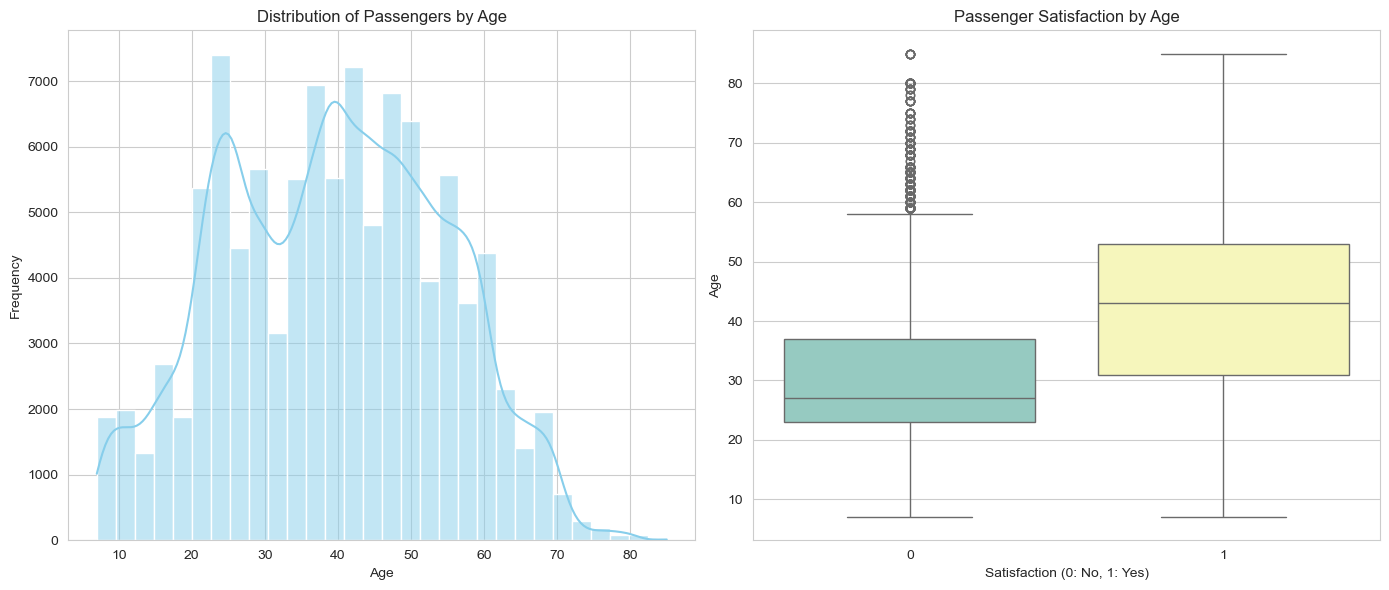

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for plotting
plt.figure(figsize=(14, 6))

# Plotting the distribution of passengers by age
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting passenger satisfaction by age
plt.subplot(1, 2, 2)
sns.boxplot(x='Satisfied', y='Age', data=data_cleaned, palette='Set3')
plt.title('Passenger Satisfaction by Age')
plt.xlabel('Satisfaction (0: No, 1: Yes)')
plt.ylabel('Age')

plt.tight_layout()
plt.show()



#### Distribution of Passengers by Age:

* The age distribution is fairly broad, with a significant concentration of passengers in their late 30s to early 50s.
* There's a noticeable peak around age 40, suggesting a higher frequency of middle-aged travelers.

#### Passenger Satisfaction by Age:

* The boxplot shows that median age is slightly higher among satisfied passengers compared to those not satisfied.
* Both groups display a similar range of ages, indicating that age alone may not be a significant determinant of satisfaction.

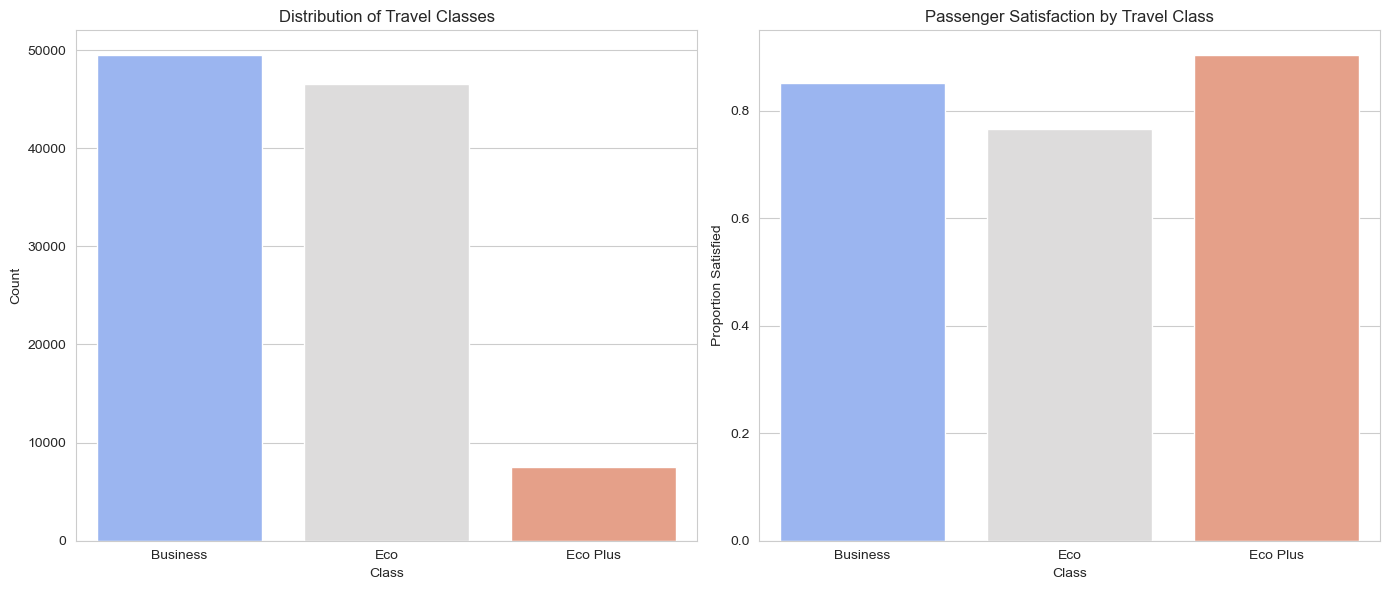

In [10]:
# Create a figure for plotting
plt.figure(figsize=(14, 6))

# Plotting the distribution of travel classes
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=data_cleaned, palette='coolwarm')
plt.title('Distribution of Travel Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Business', 'Eco', 'Eco Plus'])

# Plotting satisfaction by travel class
plt.subplot(1, 2, 2)
sns.barplot(x='Class', y='Satisfied', data=data_cleaned, ci=None, palette='coolwarm')
plt.title('Passenger Satisfaction by Travel Class')
plt.xlabel('Class')
plt.ylabel('Proportion Satisfied')
plt.xticks(ticks=[0, 1, 2], labels=['Business', 'Eco', 'Eco Plus'])

plt.tight_layout()
plt.show()


#### Distribution of Travel Classes:

* A significant number of passengers travel in Business class, followed closely by Eco class. Eco Plus has the fewest passengers.
* This distribution could indicate varying levels of service or pricing strategies that cater differently to business and economy travelers.
#### Passenger Satisfaction by Travel Class:

* Satisfaction levels are noticeably higher in Business class compared to Eco and Eco Plus.
* This could reflect better service, more comfortable seating, or additional amenities available in Business class that contribute to a higher overall satisfaction.

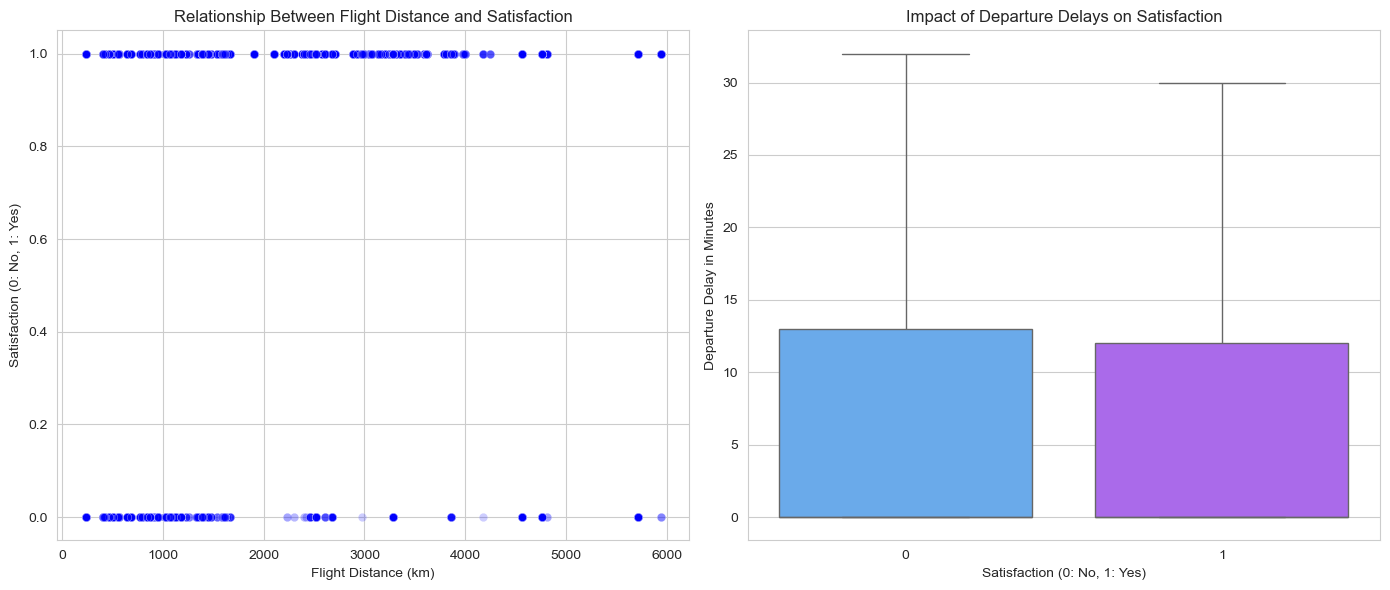

In [11]:
# Create a figure for plotting
plt.figure(figsize=(14, 6))

# Plotting relationship between flight distance and passenger satisfaction
plt.subplot(1, 2, 1)
sns.scatterplot(x='Flight Distance', y='Satisfied', data=data_cleaned, alpha=0.1, color='blue')
plt.title('Relationship Between Flight Distance and Satisfaction')
plt.xlabel('Flight Distance (km)')
plt.ylabel('Satisfaction (0: No, 1: Yes)')

# Examining delay impact on satisfaction
plt.subplot(1, 2, 2)
sns.boxplot(x='Satisfied', y='Departure Delay in Minutes', data=data_cleaned, showfliers=False, palette='cool')
plt.title('Impact of Departure Delays on Satisfaction')
plt.xlabel('Satisfaction (0: No, 1: Yes)')
plt.ylabel('Departure Delay in Minutes')

plt.tight_layout()
plt.show()


#### Relationship Between Flight Distance and Satisfaction:

* The scatter plot doesn't show a clear relationship between flight distance and satisfaction. Satisfaction appears to be more uniformly distributed regardless of flight distance, indicating that distance alone may not be a significant factor in determining passenger satisfaction.
#### Impact of Departure Delays on Satisfaction:

* The boxplot illustrates that passengers who are not satisfied tend to experience longer departure delays compared to those who are satisfied.
* This suggests that minimizing delays could potentially improve passenger satisfaction.

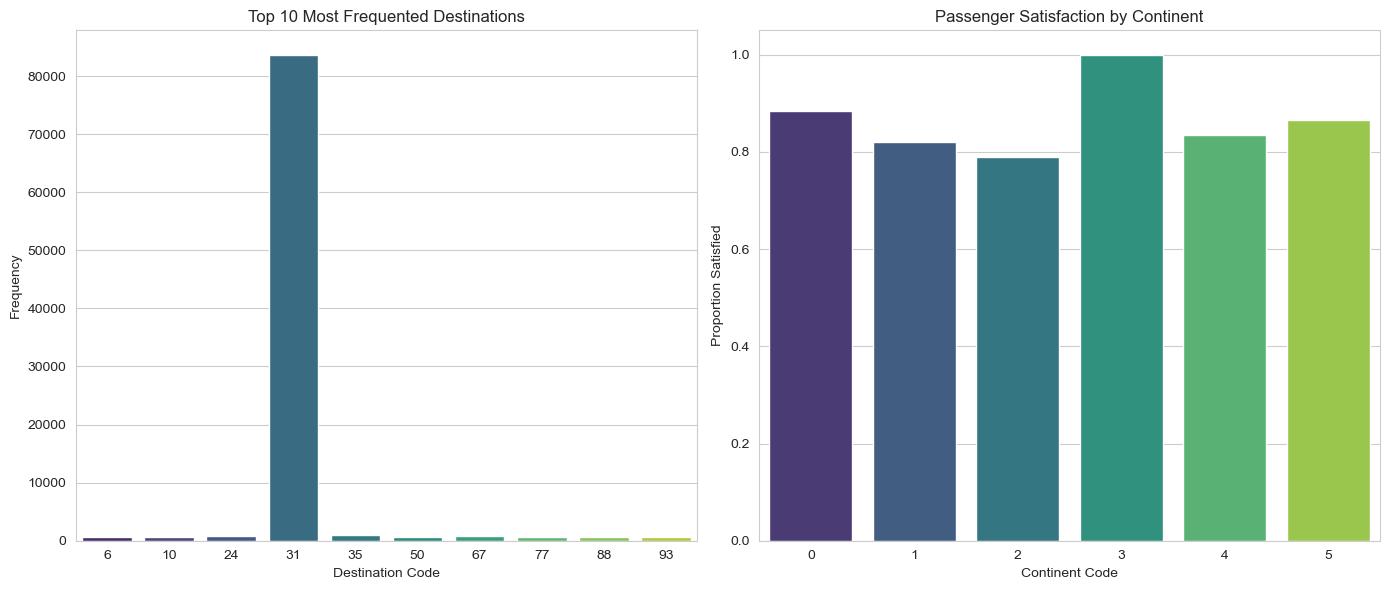

In [12]:
# Create a figure for plotting
plt.figure(figsize=(14, 6))

# Most frequented destinations
plt.subplot(1, 2, 1)
destination_counts = data_cleaned['Destination'].value_counts().head(10)
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='viridis')
plt.title('Top 10 Most Frequented Destinations')
plt.xlabel('Destination Code')
plt.ylabel('Frequency')

# Satisfaction by continent
plt.subplot(1, 2, 2)
sns.barplot(x='Continent', y='Satisfied', data=data_cleaned, ci=None, palette='viridis')
plt.title('Passenger Satisfaction by Continent')
plt.xlabel('Continent Code')
plt.ylabel('Proportion Satisfied')

plt.tight_layout()
plt.show()


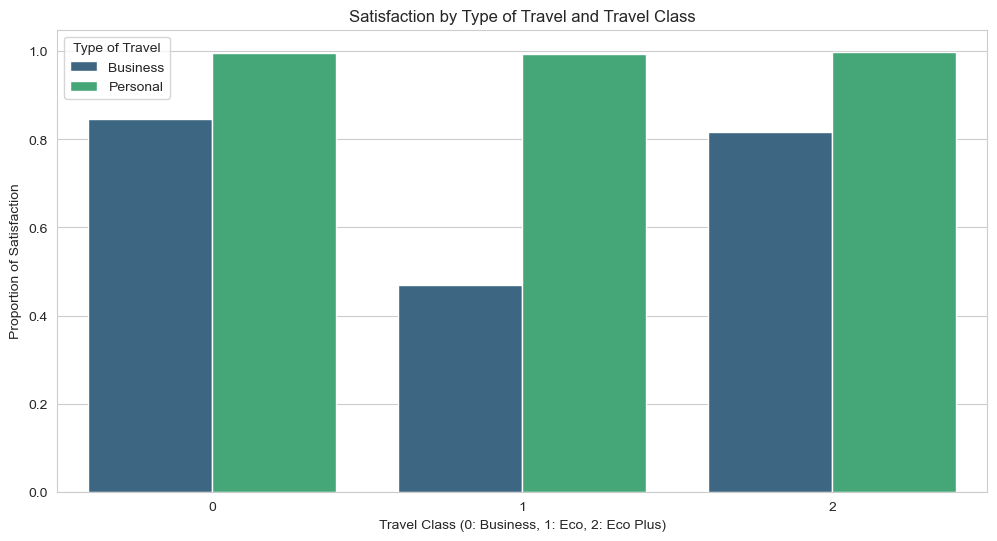

In [13]:
# Create a bar plot for Satisfaction by Type of Travel and Class
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Satisfied', hue='Type of Travel', data=data_cleaned, ci=None, palette='viridis')
plt.title('Satisfaction by Type of Travel and Travel Class')
plt.xlabel('Travel Class (0: Business, 1: Eco, 2: Eco Plus)')
plt.ylabel('Proportion of Satisfaction')
plt.legend(title='Type of Travel', labels=['Business', 'Personal'])
plt.show()


* Business Class: Satisfaction is notably high for both business and personal travelers, although it's slightly higher for business travelers, aligning with the expectations of service quality in this class.
* Eco and Eco Plus: There is a significant disparity in satisfaction between business and personal travelers, with personal travelers showing much lower satisfaction, particularly in Eco Plus class. This suggests that the expectations and experiences of personal travelers in lower classes are not being met as effectively.

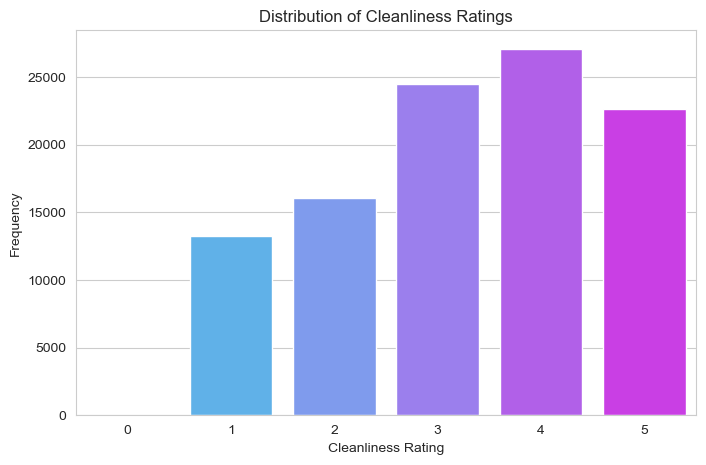

In [14]:
# Plotting the distribution of cleanliness ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Cleanliness', data=data_cleaned, palette='cool')
plt.title('Distribution of Cleanliness Ratings')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.show()


The distribution of cleanliness ratings shows a broad spread across the scale from 0 to 5, with a substantial number of ratings at the higher end (4 and 5). This indicates that many passengers find the cleanliness levels satisfactory, but there's also a significant count of lower ratings, suggesting areas for improvement

In [15]:
data_cleaned.columns

Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel',
       'Class', 'Flight Distance', 'Destination', 'Continent',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Selecting features for the model
feature_columns = ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 
                   'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
                   'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                   'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Target variable
target_column = 'Satisfied'

# Preparing the feature matrix and target vector
X = data_cleaned[feature_columns]
y = data_cleaned[target_column]


In [17]:

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [18]:
# Creating the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [19]:
# Predicting the test results
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy


0.9908298207793044

In [20]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5675
           1       0.99      1.00      0.99     25404

    accuracy                           0.99     31079
   macro avg       0.99      0.98      0.98     31079
weighted avg       0.99      0.99      0.99     31079



In [21]:
# Extracting feature importances from the Random Forest model
feature_importances = clf.feature_importances_

# Creating a DataFrame to view the feature importances
importances_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance %s': feature_importances*100
}).sort_values(by='Importance %s', ascending=False)

importances_df


,Feature,Importance %s
5,Inflight wifi service,20.472951
2,Type of Travel,15.984512
1,Age,11.668578
3,Class,8.483528
6,Departure/Arrival time convenient,7.173111
7,Ease of Online booking,6.981541
10,Online boarding,5.819484
8,Gate location,3.645889
12,Inflight entertainment,2.865121
11,Seat comfort,2.117114


#### Key Feature Importances:
1. **Inflight Wifi Service (20.47%)**: The most significant predictor of satisfaction, highlighting the importance of connectivity for passengers.
2. **Type of Travel (15.98%)**: Indicates that whether the travel is for business or personal reasons greatly impacts satisfaction levels.
3. **Age (11.67%)**: Older or younger ages might have different expectations and satisfaction levels.
4. **Class (8.48%)**: The travel class (Business, Eco, Eco Plus) significantly affects passenger satisfaction.
5. **Departure/Arrival Time Convenient (7.17%) and Ease of Online Booking (6.98%)**: These convenience factors are crucial in shaping the overall travel experience.

### Suggested Strategies

1. **Enhance Inflight Services:** Prioritize improvements in inflight wifi and entertainment as they significantly affect passenger satisfaction.
2. **Optimize Booking and Boarding:** Streamline online booking and boarding processes to enhance the travel experience.
3. **Customize Offerings:** Tailor services and promotions specifically for business and personal travelers, and adjust amenities across different travel classes to improve satisfaction.
4. **Use Predictive Analytics:** Apply insights from data to predict and prevent issues that may cause delays, enhancing operational efficiency.
5. **Implement Feedback Mechanisms:** Utilize customer feedback to continually adjust and improve services, ensuring they meet passenger needs.


In [22]:
import pickle

# Serializing the model
model_file_path = 'Airlines_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved to {model_file_path}")

Model saved to Airlines_model.pkl
